In [1]:
from steps import preprocess
import models.ssmrk as ssmrk
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils as u
import geopandas as gpd
import mplleaflet

from visualization import papermode
papermode(plt, size=12)

In [2]:
abbr = "D21"
preprocess(abbr)
ssmrk_df, pentzer_df = ssmrk.ssmrk_main(abbr);

D21 : Exported merged CSV in data/runs/D21/elec/D21_2022-08-10-14-00-53-VG-GrandAxePentzerLike_elec_motor_data.csv
Primary topic : mcu_status
D21 : Exported merged CSV in data/runs/D21/merged/D21_2022-08-10-14-00-53-VG-GrandAxePentzerLike_m.csv
D21 : Exported cut CSV in data/runs/D21/merged/D21_2022-08-10-14-00-53-VG-GrandAxePentzerLike_mc.csv
Constant columns : 19
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/position/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_

(-50.43211360641815, 5.955401678941383, -13.626715379310458, 36.42483680296581)

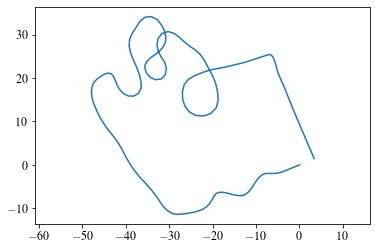

In [3]:
fig, ax = plt.subplots()
ax.plot(ssmrk_df.px, ssmrk_df.py)
ax.axis("equal")

In [4]:
import utils.odom_utils as odou

coords = odou.transform_odom(
    ssmrk_df.px,
    ssmrk_df.py,
    parameters={
        "tx": 46.780305,
        "ty": -71.2751,
        "theta": 15,
    },
)

In [5]:
geo_gdf = gpd.GeoDataFrame(coords, geometry=gpd.points_from_xy(coords.lon, coords.lat))

In [6]:
import folium

# Get center coordinates
mean = lambda span: (span.max() + span.min()) / 2

position = (mean(coords.lat), mean(coords.lon))
m = folium.Map(location=position, zoom_start=32)
path_coords = [(glat, glong) for glat, glong in zip(coords.lat, coords.lon)]
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
    ).add_to(m)
folium.PolyLine(path_coords, color="red", weight=2.5, opacity=0.5).add_to(m)

m

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

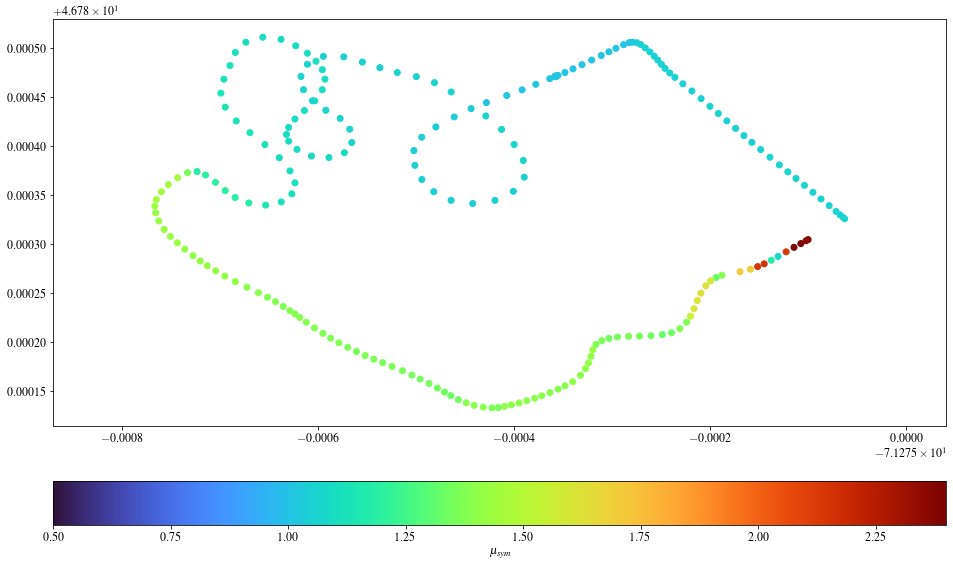

In [21]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=0.5, vmax=2.4)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.pentz_sym_m))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel("$\mu_{sym}$");
ax.axis("equal")

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

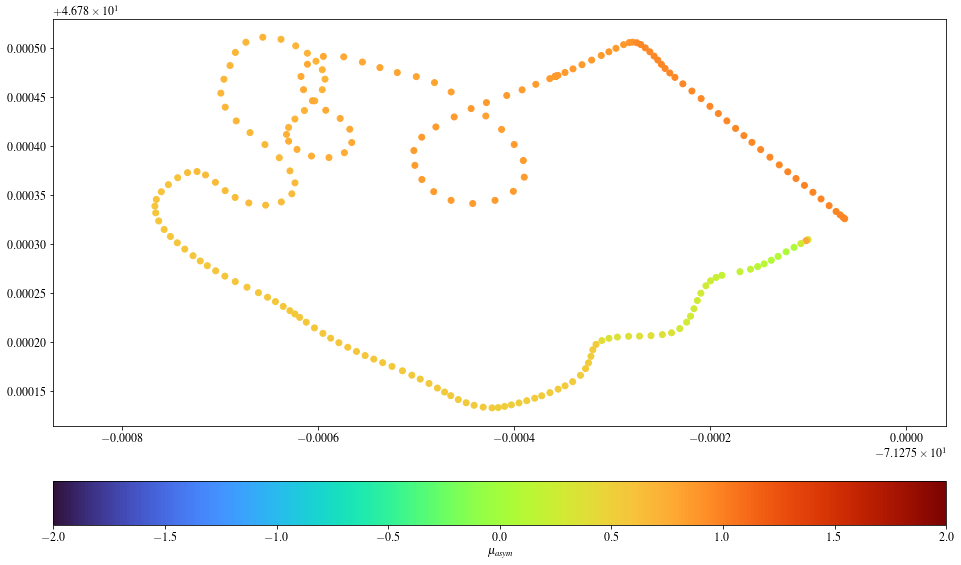

In [22]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=-2, vmax=2)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.pentz_asym_m))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel("$\mu_{asym}$");
ax.axis("equal")

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

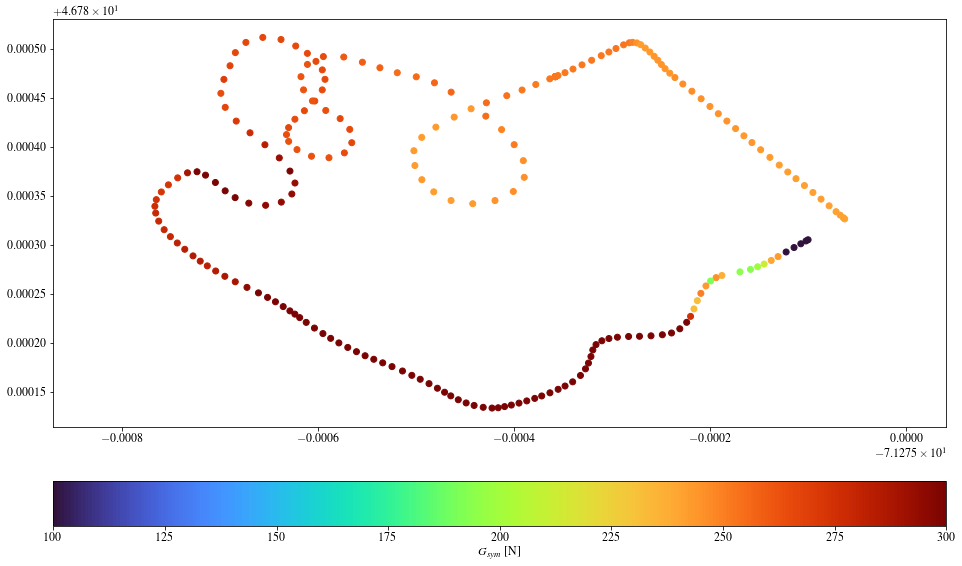

In [24]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=100, vmax=300)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.pentz_sym_G))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel("$G_{sym}$ [N]");
ax.axis("equal")

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

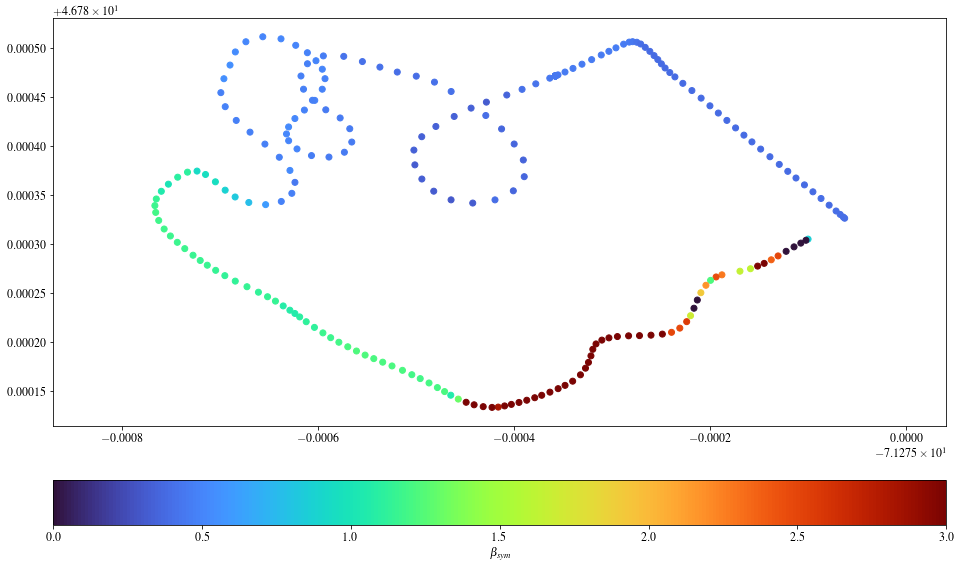

In [25]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=0, vmax=3)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.pentz_sym_B))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel(r"$\beta_{sym}$");
ax.axis("equal")

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

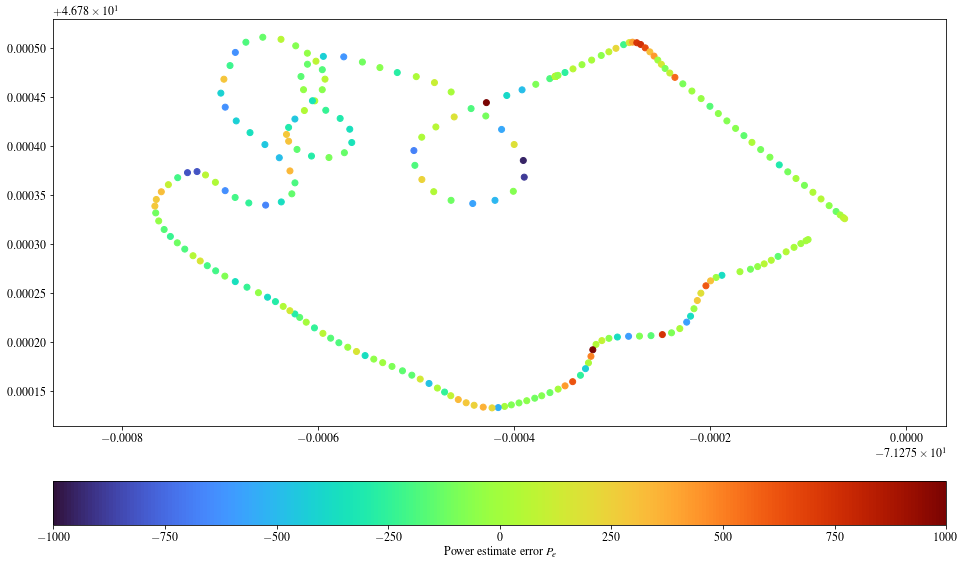

In [26]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=-1000, vmax=1000)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.P_err_t))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel(r"Power estimate error $P_e$");
ax.axis("equal")

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

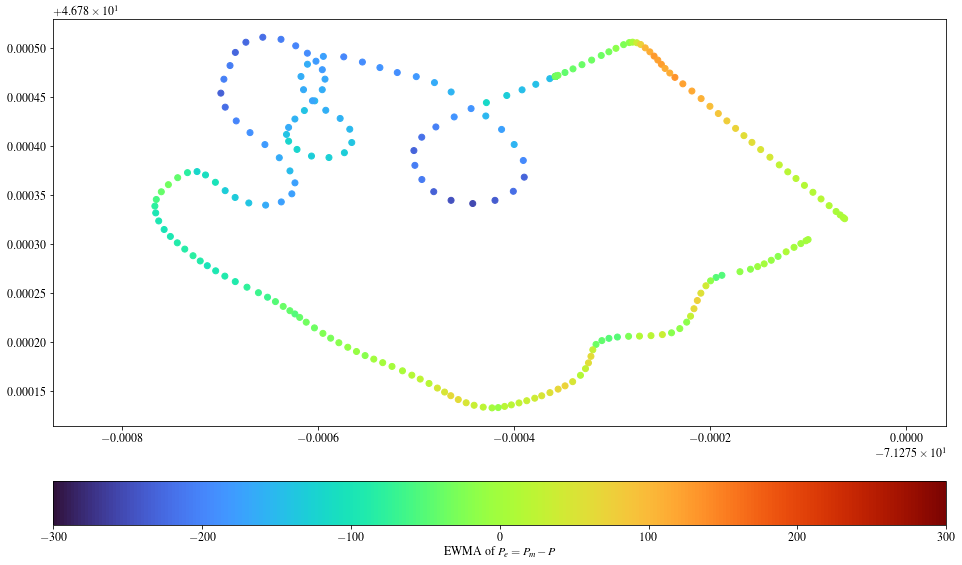

In [27]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=-300, vmax=300)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.EWMA_t))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel(r"EWMA of $P_e = P_m - P$");
ax.axis("equal")

(-71.2758016421786, -71.27502767809509, 46.780114358043605, 46.78053021048607)

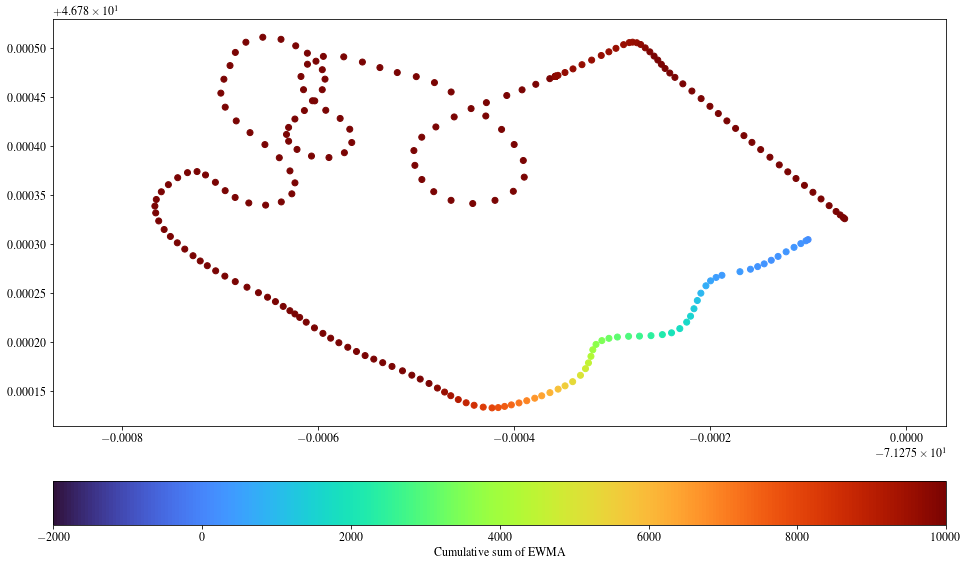

In [28]:
cm = plt.get_cmap("turbo")
coords = odou.transform_odom(ssmrk_df.px, ssmrk_df.py, abbr=abbr)
fig, ax = plt.subplots(figsize=(16, 10))
cnorm = mpl.colors.Normalize(vmin=-2000, vmax=10000)
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)
ax.scatter(coords.lon, coords.lat, c=scmap.to_rgba(pentzer_df.estimator_conv))
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.1)
cb.ax.set_xlabel(r"Cumulative sum of EWMA");
ax.axis("equal")

In [29]:
fig, ax = plt.subplots()
ax.plot(coords.lon, coords.lat, "b")
mplleaflet.display(fig)

/home/norlab/code/202206/terrain-code/venv/lib/python3.9/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [30]:
geo_gdf["P_err_t"] = pentzer_df.P_err_t
# geo_gdf.plot("P_err_t")
geo_gdf.explore(column="P_err_t", tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}")